# FINAL PROJECT

# Department Marketing The Look - Jihan Syania - DBA2092442

# 1. Business Understanding

The Look adalah situs pakaian eCommerce fiktif yang dikembangkan oleh tim Looker. Dataset berisi informasi tentang pelanggan, produk, pesanan, logistik, acara web, dan kampanye pemasaran digital. Isi dari kumpulan data ini adalah sintetis, dan diberikan kepada praktisi industri untuk tujuan penemuan, pengujian, dan evaluasi produk.

Tujuannya: Meningkatkan total users dan order barang pada tahun 2022 di seluruh negara

What: Meningkatkan jumlah users dan order barang

When: Tahun 2022

Where: Diseluruh negara

Who: Users

Why: Karena terdapat beberapa negara dengan users yang sedikit dan masih ada beberapa user yang belum pernah melakukan order

How: Mengidentifikasi total users setiap negara, mengidentifikasi total barang yang diorder

## Import Library

In [1]:
import pandas as pd                   # Alias digunakan untuk mempermudah kita memanggil software library dan methods didalamnya
import numpy as np                    # Numpy adalah paket dasar untuk komputasi ilmiah di python
from math import sqrt                 # memanggil function sqrt, operasi matematika akar
from pandas import Series             # function Series seperti array 1 dimensi (dengan axis sebagai index) untuk menyimpan berbagai
                                      #tipe data, seperti integer, string, float, python objects, etc.

from matplotlib import pyplot         # pyplot adalah sekumpulan fungsi dari matplotlib yang membuatnya bekerja seperti halnya MATLAB.
from matplotlib.pyplot import figure  # figure memberikan identifier unik untuk sebuah gambar grafik dari pyplot
import matplotlib.pyplot as plt       # matplotlib adalah library komprehensif untuk membuat visualisasi statis, animasi, maupun interaktif di Python
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k') # menetapkan format gambar grafik dg ukuran (16,12), dpi=80, facecolor=white, edgecolor=black
from matplotlib.pylab import rcParams # rc (runtime configuration) parameters, untuk merubah tampilan visual output matplotlib secara interaktif, 
                                      # (misal ubah warna, jenis garis untuk grafik dll)

import statsmodels.api as sm          # modul berisikan classes dan functions digunakan untuk estimasi model-model statistik, uji tes statistik, dan eksplorasi data.
import statsmodels.tsa.api as smt     # digunakan untuk mengakses Time-series models dan methods pd librari statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt  # mengakses 3 modul holt-winters di modul time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose #mengakses modul seasonal decompose pada modul time series analysis
from statsmodels.tsa.stattools import adfuller # mengakses function Augmented Dickey-Fuller unit root test. 
from statsmodels.tsa.arima_model import ARIMA  # mengakses function ARIMA
import statsmodels.formula.api as smf # digunakan untuk menentukan model dengan formula strings dan DataFrames.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error 

from datetime import datetime         
import warnings                       # built-in modul untuk menghandle message dari issue warning, jika ada package yg obsolete
warnings.filterwarnings('ignore')     # filter untuk mengabaikan tipe warning
import sys                            # mengakses built-in function pada Python (args maupun keyword-args)
import itertools                      # digunakan iterasi pada struktur data yang dapat ditulis ulang menggunakan for-loop. 
                                      # Struktur data seperrti ini juga dikenal sebagai iterables
import seaborn as sns                 # Adalah library visualisasi data di Python yg berdasarkan matplotlib
%matplotlib inline   

In [2]:
#Menggunakan data users saja
u=pd.read_csv('users.csv')
u

,user_id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,month_created,date_created,year_created
0,19279,Heidi,Jackson,heidijackson@example.org,50,F,Mie,894 Nicholas Curve Suite 865,513-0836,Suzuka City,Japan,34.851814,136.508713,Search,2020-11-07 12:40:00,2020-11-01 00:00:00,2020-11,2020
1,5678,Michael,Brooks,michaelbrooks@example.org,58,M,Acre,0549 Deanna Land,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Email,2019-07-28 04:20:00,2019-07-01 00:00:00,2019-07,2019
2,29694,Scott,Anderson,scottanderson@example.org,60,M,Acre,8979 Stephens Oval Apt. 816,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Facebook,2019-08-16 17:06:00,2019-08-01 00:00:00,2019-08,2019
3,29967,Mike,Beck,mikebeck@example.org,12,M,Acre,76404 Michael Way Apt. 377,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-05-09 12:08:00,2019-05-01 00:00:00,2019-05,2019
4,47096,Holly,Kennedy,hollykennedy@example.org,68,F,Acre,23658 Santana Mission,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2019-05-24 15:53:00,2019-05-01 00:00:00,2019-05,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,91847,Megan,Carter,megancarter@example.com,67,F,Jeju Special Self-Governing Province,39055 Mark Meadow Apt. 438,699-930,Seogwipo City,South Korea,33.220465,126.237860,Facebook,2021-03-28 13:47:00,2021-03-01 00:00:00,2021-03,2021
99996,12802,Jackie,Alexander,jackiealexander@example.com,35,F,Jeju Special Self-Governing Province,13698 Jacqueline Island,699-940,Seogwipo City,South Korea,33.305744,126.675429,Email,2020-01-17 09:21:00,2020-01-01 00:00:00,2020-01,2020
99997,28309,Michael,Edwards,michaeledwards@example.org,59,M,Jeju Special Self-Governing Province,2445 Jonathan Gateway,699-940,Seogwipo City,South Korea,33.305744,126.675429,Email,2021-12-16 03:27:00,2021-12-01 00:00:00,2021-12,2021
99998,35063,Tina,Burns,tinaburns@example.net,23,F,Jeju Special Self-Governing Province,2899 Nicholas Groves,699-940,Seogwipo City,South Korea,33.305744,126.675429,Search,2019-03-07 05:46:00,2019-03-01 00:00:00,2019-03,2019


In [3]:
#Melihat informasi dari data 
u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99065 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
 15  month_created   100000 non-null  object 
 16  date_created    100000 non-null  object 
 17  year_create

In [4]:
u.describe(include='all')

,user_id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at,month_created,date_created,year_created
count,100000.000000,100000,100000,100000,100000.000000,100000,100000,100000,100000,99065,100000,100000.000000,100000.000000,100000,100000,100000,100000,100000.000000
unique,NaN,690,1000,83709,NaN,2,228,99999,15672,7925,15,NaN,NaN,5,96768,42,42,NaN
top,NaN,Michael,Smith,michaelsmith@example.org,NaN,F,Guangdong,310 John Turnpike,02675-031,Shanghai,China,NaN,NaN,Search,2020-02-08 00:51:00,2022-05-01 00:00:00,2022-05,NaN
freq,NaN,2331,2247,24,NaN,50053,5218,2,465,2473,34001,NaN,NaN,70181,3,4512,4512,NaN
mean,50000.500000,NaN,NaN,NaN,41.057690,NaN,NaN,NaN,NaN,NaN,NaN,28.210711,25.257163,NaN,NaN,NaN,NaN,2020.286740
std,28867.657797,NaN,NaN,NaN,17.000799,NaN,NaN,NaN,NaN,NaN,NaN,22.176740,89.663548,NaN,NaN,NaN,NaN,1.030985
min,1.000000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,-43.253132,-158.164931,NaN,NaN,NaN,NaN,2019.000000
25%,25000.750000,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,26.057472,-50.000131,NaN,NaN,NaN,NaN,2019.000000
50%,50000.500000,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.242914,4.812536,NaN,NaN,NaN,NaN,2020.000000
75%,75000.250000,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,NaN,40.724087,116.385652,NaN,NaN,NaN,NaN,2021.000000


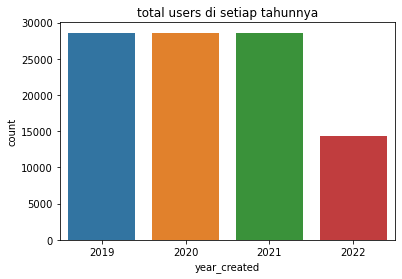

2020    28581
2019    28555
2021    28499
2022    14365
Name: year_created, dtype: int64


In [5]:
#Melihat total users dari setiap tahunnya
sns.countplot(x=u['year_created'])
plt.title ('total users di setiap tahunnya')
plt.show()
print(u['year_created'].value_counts()) 

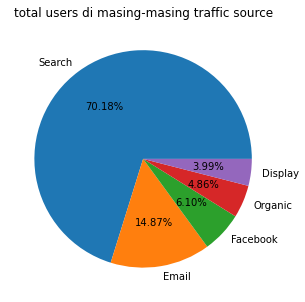

Search      70181
Organic     14866
Facebook     6098
Email        4863
Display      3992
Name: traffic_source, dtype: int64


In [6]:
plt.figure(figsize=(10,5))
plt.pie(u['traffic_source'].value_counts(), labels=u['traffic_source'].unique(),
        autopct='%.2f%%')
plt.title ('total users di masing-masing traffic source')
plt.show()
print(u['traffic_source'].value_counts()) 

In [7]:
def plot_count(data, x=None, y=None, palette=None, figsize=(20, 10), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

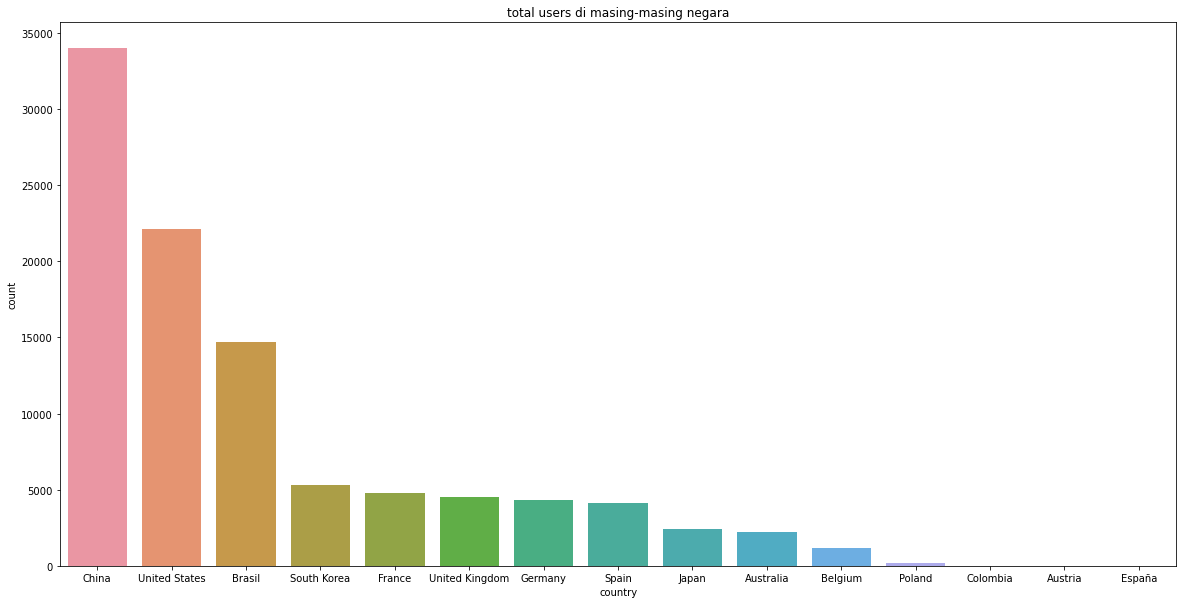

China             34001
United States     22107
Brasil            14717
South Korea        5279
France             4789
United Kingdom     4538
Germany            4340
Spain              4129
Japan              2425
Australia          2233
Belgium            1200
Poland              213
Colombia             16
Austria               8
España                5
Name: country, dtype: int64


In [8]:
#Melihat total order masing-masing negara
plot_count(x='country', data=u)
plt.title ('total users di masing-masing negara')
plt.show()
print(u['country'].value_counts()) 

# 

# Analisis Departemen Marketing

# 2. Data Understanding

In [9]:
#Menggunakan data users yang sudah join dengan order_item dan product
df=pd.read_csv('JihanSyania_Marketing.csv')
df

,user_id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,date_created,year_created,date_order,year_order,date_return,year_return,date_shipped,year_shipped,date_delivered,year_delivered
0,93393,Aaron,Pratt,aaronpratt@example.org,60,M,Wallonia,476 Alex Brooks,4470,Saint-Georges-sur-Meuse,...,2020-03,2020,2020-08,2020.0,NaN,NaN,NaN,NaN,NaN,NaN
1,93393,Aaron,Pratt,aaronpratt@example.org,60,M,Wallonia,476 Alex Brooks,4470,Saint-Georges-sur-Meuse,...,2020-03,2020,2022-03,2022.0,NaN,NaN,2022-03,2022.0,NaN,NaN
2,81017,Aaron,Phillips,aaronphillips@example.net,34,M,Sichuan,8586 Richard Estate Suite 559,610105,Zaozhuang,...,2020-05,2020,2021-09,2021.0,NaN,NaN,2021-09,2021.0,NaN,NaN
3,71882,Aaron,Harper,aaronharper@example.org,13,M,Jiangsu,6854 Jenny Key,223021,Suizhou,...,2020-08,2020,2020-12,2020.0,NaN,NaN,2020-12,2020.0,NaN,NaN
4,99032,Aaron,Boyer,aaronboyer@example.org,21,M,Victoria,2143 Daniel Radial Apt. 396,3023,Melbourne,...,2021-05,2021,2021-12,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200517,31373,Zoe,Gardner,zoegardner@example.com,61,F,Jiangxi,9965 Nicholas Alley,330038,Hohhot,...,2019-05,2019,2021-07,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
200518,31373,Zoe,Gardner,zoegardner@example.com,61,F,Jiangxi,9965 Nicholas Alley,330038,Hohhot,...,2019-05,2019,2021-01,2021.0,NaN,NaN,2021-01,2021.0,2021-01,2021.0
200519,37083,Zoe,Griffin,zoegriffin@example.org,13,F,Pará,557 Philip Pike Suite 555,68445-000,Barcarena,...,2021-02,2021,2021-08,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
200520,37083,Zoe,Griffin,zoegriffin@example.org,13,F,Pará,557 Philip Pike Suite 555,68445-000,Barcarena,...,2021-02,2021,2021-05,2021.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Melihat informasi dari data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200522 entries, 0 to 200521
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           200522 non-null  int64  
 1   first_name        200522 non-null  object 
 2   last_name         200522 non-null  object 
 3   email             200522 non-null  object 
 4   age               200522 non-null  int64  
 5   gender            200522 non-null  object 
 6   state             200522 non-null  object 
 7   street_address    200522 non-null  object 
 8   postal_code       200522 non-null  object 
 9   city              198553 non-null  object 
 10  country           200522 non-null  object 
 11  latitude          200522 non-null  float64
 12  longitude         200522 non-null  float64
 13  traffic_source    200522 non-null  object 
 14  created_at        200522 non-null  object 
 15  order_id          180508 non-null  float64
 16  status            18

Insight:

1. Total data users hanya 100.000, namun terdapat 180.508 data orders, artinya ada users yang melakukan orders lebih dari sekali
2. Dari total 180.508 order, terjadi return sebanyak 17.752

In [11]:
#melihat data yang duplicated
df.duplicated().sum()

6

In [12]:
df.drop_duplicates(subset=None, keep='first', inplace=False)

,user_id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,date_created,year_created,date_order,year_order,date_return,year_return,date_shipped,year_shipped,date_delivered,year_delivered
0,93393,Aaron,Pratt,aaronpratt@example.org,60,M,Wallonia,476 Alex Brooks,4470,Saint-Georges-sur-Meuse,...,2020-03,2020,2020-08,2020.0,NaN,NaN,NaN,NaN,NaN,NaN
1,93393,Aaron,Pratt,aaronpratt@example.org,60,M,Wallonia,476 Alex Brooks,4470,Saint-Georges-sur-Meuse,...,2020-03,2020,2022-03,2022.0,NaN,NaN,2022-03,2022.0,NaN,NaN
2,81017,Aaron,Phillips,aaronphillips@example.net,34,M,Sichuan,8586 Richard Estate Suite 559,610105,Zaozhuang,...,2020-05,2020,2021-09,2021.0,NaN,NaN,2021-09,2021.0,NaN,NaN
3,71882,Aaron,Harper,aaronharper@example.org,13,M,Jiangsu,6854 Jenny Key,223021,Suizhou,...,2020-08,2020,2020-12,2020.0,NaN,NaN,2020-12,2020.0,NaN,NaN
4,99032,Aaron,Boyer,aaronboyer@example.org,21,M,Victoria,2143 Daniel Radial Apt. 396,3023,Melbourne,...,2021-05,2021,2021-12,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200517,31373,Zoe,Gardner,zoegardner@example.com,61,F,Jiangxi,9965 Nicholas Alley,330038,Hohhot,...,2019-05,2019,2021-07,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
200518,31373,Zoe,Gardner,zoegardner@example.com,61,F,Jiangxi,9965 Nicholas Alley,330038,Hohhot,...,2019-05,2019,2021-01,2021.0,NaN,NaN,2021-01,2021.0,2021-01,2021.0
200519,37083,Zoe,Griffin,zoegriffin@example.org,13,F,Pará,557 Philip Pike Suite 555,68445-000,Barcarena,...,2021-02,2021,2021-08,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
200520,37083,Zoe,Griffin,zoegriffin@example.org,13,F,Pará,557 Philip Pike Suite 555,68445-000,Barcarena,...,2021-02,2021,2021-05,2021.0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.describe()

,user_id,age,latitude,longitude,order_id,num_of_item,product_id,year_created,year_order,year_return,year_shipped,year_delivered
count,200522.000000,200522.000000,200522.000000,200522.000000,180508.000000,180508.000000,180508.000000,200522.000000,180508.000000,17752.000000,117502.000000,63035.000000
mean,50150.504887,41.086928,28.241146,25.209261,62408.024420,1.894021,15290.370105,2020.289634,2021.133329,2021.140322,2021.135462,2021.139446
std,28853.594268,17.003410,22.154275,89.707316,35991.857094,1.058109,8405.434843,1.031862,0.851504,0.854243,0.852152,0.855045
min,1.000000,12.000000,-43.253132,-158.164931,1.000000,1.000000,1.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
25%,25207.250000,26.000000,26.083985,-50.271373,31249.750000,1.000000,8050.000000,2019.000000,2021.000000,2021.000000,2021.000000,2021.000000
50%,50259.500000,41.000000,35.213804,4.764668,62520.000000,2.000000,16029.000000,2020.000000,2021.000000,2021.000000,2021.000000,2021.000000
75%,75161.750000,56.000000,40.722454,116.392818,93647.000000,2.000000,22547.000000,2021.000000,2022.000000,2022.000000,2022.000000,2022.000000
max,100000.000000,70.000000,64.865194,153.543292,124512.000000,4.000000,29120.000000,2022.000000,2022.000000,2022.000000,2022.000000,2022.000000


In [14]:
df.describe(include='all')

,user_id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,date_created,year_created,date_order,year_order,date_return,year_return,date_shipped,year_shipped,date_delivered,year_delivered
count,200522.000000,200522,200522,200522,200522.000000,200522,200522,200522,200522,198553,...,200522,200522.000000,180508,180508.000000,17752,17752.000000,117502,117502.000000,63035,63035.000000
unique,NaN,690,1000,83709,NaN,2,228,99999,15672,7925,...,42,NaN,42,NaN,42,NaN,42,NaN,42,NaN
top,NaN,Michael,Smith,christopherjohnson@example.org,NaN,M,Guangdong,012 Ashley Forges,02675-031,Shanghai,...,2022-05,NaN,2022-05,NaN,2022-05,NaN,2022-05,NaN,2022-05,NaN
freq,NaN,4597,4470,53,NaN,100518,10445,13,934,4905,...,9094,NaN,23599,NaN,1851,NaN,13804,NaN,6677,NaN
mean,50150.504887,NaN,NaN,NaN,41.086928,NaN,NaN,NaN,NaN,NaN,...,NaN,2020.289634,NaN,2021.133329,NaN,2021.140322,NaN,2021.135462,NaN,2021.139446
std,28853.594268,NaN,NaN,NaN,17.003410,NaN,NaN,NaN,NaN,NaN,...,NaN,1.031862,NaN,0.851504,NaN,0.854243,NaN,0.852152,NaN,0.855045
min,1.000000,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,2019.000000,NaN,2019.000000,NaN,2019.000000,NaN,2019.000000,NaN,2019.000000
25%,25207.250000,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,2019.000000,NaN,2021.000000,NaN,2021.000000,NaN,2021.000000,NaN,2021.000000
50%,50259.500000,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,2020.000000,NaN,2021.000000,NaN,2021.000000,NaN,2021.000000,NaN,2021.000000
75%,75161.750000,NaN,NaN,NaN,56.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,2021.000000,NaN,2022.000000,NaN,2022.000000,NaN,2022.000000,NaN,2022.000000


In [15]:
print(df.isnull().sum())

user_id                  0
first_name               0
last_name                0
email                    0
age                      0
gender                   0
state                    0
street_address           0
postal_code              0
city                  1969
country                  0
latitude                 0
longitude                0
traffic_source           0
created_at               0
order_id             20014
status               20014
created_order_at     20014
returned_at         182770
shipped_at           83020
delivered_at        137487
num_of_item          20014
product_id           20014
brand                20157
product_category     20014
product_name         20026
month_created            0
date_created             0
year_created             0
date_order           20014
year_order           20014
date_return         182770
year_return         182770
date_shipped         83020
year_shipped         83020
date_delivered      137487
year_delivered      137487
d

Insight:

1. terdapat 1.399 data yang tidak mencantumkan nama kota
2. terdapat 20.014 users yang tidak melakukan order

# 2. Data Preparation

In [16]:
#Mengambil beberapa feature yang dibutuhkan dalam analisis
#Karena pada kolom street_address, postal_code, country dan country tidak terdapat missing value, 
#maka missing value pada kolom city dapat diabaikan

df=df[['age', 'gender', 'state', 'country', 'traffic_source', 'date_created', 'year_created', 'num_of_item',
       'date_order', 'year_order','date_return', 'year_return', 'date_shipped', 'year_shipped',
      'date_delivered', 'year_delivered']]
df

,age,gender,state,country,traffic_source,date_created,year_created,num_of_item,date_order,year_order,date_return,year_return,date_shipped,year_shipped,date_delivered,year_delivered
0,60,M,Wallonia,Belgium,Search,2020-03,2020,2.0,2020-08,2020.0,NaN,NaN,NaN,NaN,NaN,NaN
1,60,M,Wallonia,Belgium,Search,2020-03,2020,1.0,2022-03,2022.0,NaN,NaN,2022-03,2022.0,NaN,NaN
2,34,M,Sichuan,China,Search,2020-05,2020,2.0,2021-09,2021.0,NaN,NaN,2021-09,2021.0,NaN,NaN
3,13,M,Jiangsu,China,Search,2020-08,2020,2.0,2020-12,2020.0,NaN,NaN,2020-12,2020.0,NaN,NaN
4,21,M,Victoria,Australia,Email,2021-05,2021,1.0,2021-12,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200517,61,F,Jiangxi,China,Search,2019-05,2019,1.0,2021-07,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
200518,61,F,Jiangxi,China,Search,2019-05,2019,2.0,2021-01,2021.0,NaN,NaN,2021-01,2021.0,2021-01,2021.0
200519,13,F,Pará,Brasil,Organic,2021-02,2021,1.0,2021-08,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
200520,13,F,Pará,Brasil,Organic,2021-02,2021,2.0,2021-05,2021.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Drop missing value pada data order, yaitu users yang tidak melakukan order

dforder=df.dropna(subset=['date_order'])
print("Jumlah data setelah menghapus missing value:", len(dforder))
dforder

Jumlah data setelah menghapus missing value: 180508


,age,gender,state,country,traffic_source,date_created,year_created,num_of_item,date_order,year_order,date_return,year_return,date_shipped,year_shipped,date_delivered,year_delivered
0,60,M,Wallonia,Belgium,Search,2020-03,2020,2.0,2020-08,2020.0,NaN,NaN,NaN,NaN,NaN,NaN
1,60,M,Wallonia,Belgium,Search,2020-03,2020,1.0,2022-03,2022.0,NaN,NaN,2022-03,2022.0,NaN,NaN
2,34,M,Sichuan,China,Search,2020-05,2020,2.0,2021-09,2021.0,NaN,NaN,2021-09,2021.0,NaN,NaN
3,13,M,Jiangsu,China,Search,2020-08,2020,2.0,2020-12,2020.0,NaN,NaN,2020-12,2020.0,NaN,NaN
4,21,M,Victoria,Australia,Email,2021-05,2021,1.0,2021-12,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200517,61,F,Jiangxi,China,Search,2019-05,2019,1.0,2021-07,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
200518,61,F,Jiangxi,China,Search,2019-05,2019,2.0,2021-01,2021.0,NaN,NaN,2021-01,2021.0,2021-01,2021.0
200519,13,F,Pará,Brasil,Organic,2021-02,2021,1.0,2021-08,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
200520,13,F,Pará,Brasil,Organic,2021-02,2021,2.0,2021-05,2021.0,NaN,NaN,NaN,NaN,NaN,NaN


## Data Exploratory

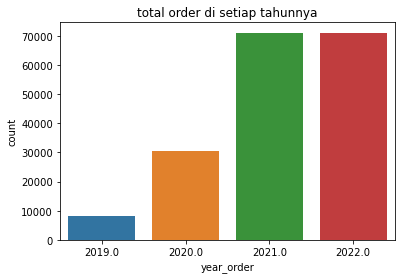

2021.0    71069
2022.0    70861
2020.0    30362
2019.0     8216
Name: year_order, dtype: int64


In [18]:
#Melihat total order dari setiap tahunnya
sns.countplot(x=dforder['year_order'])
plt.title ('total order di setiap tahunnya')
plt.show()
print(dforder['year_order'].value_counts()) 

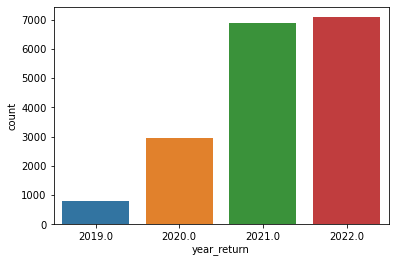

2022.0    7085
2021.0    6885
2020.0    2970
2019.0     812
Name: year_return, dtype: int64


In [19]:
# Melihat total return setiap tahunnya
sns.countplot(x=dforder['year_return'])
plt.show()
print(dforder['year_return'].value_counts()) 

In [20]:
def plot_count(data, x=None, y=None, palette=None, figsize=(20, 10), **kwargs):
    column_order = data[x or y].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, y=y, data=data, order=column_order,
        palette=palette, **kwargs
    )
    plt.grid(False)


MAIN_COLOR = ["#29B5BF"]    # warna utama untuk visualisasi
OTHER_COLOR = ["#777777"]    # warna lainnya untuk visualisasi

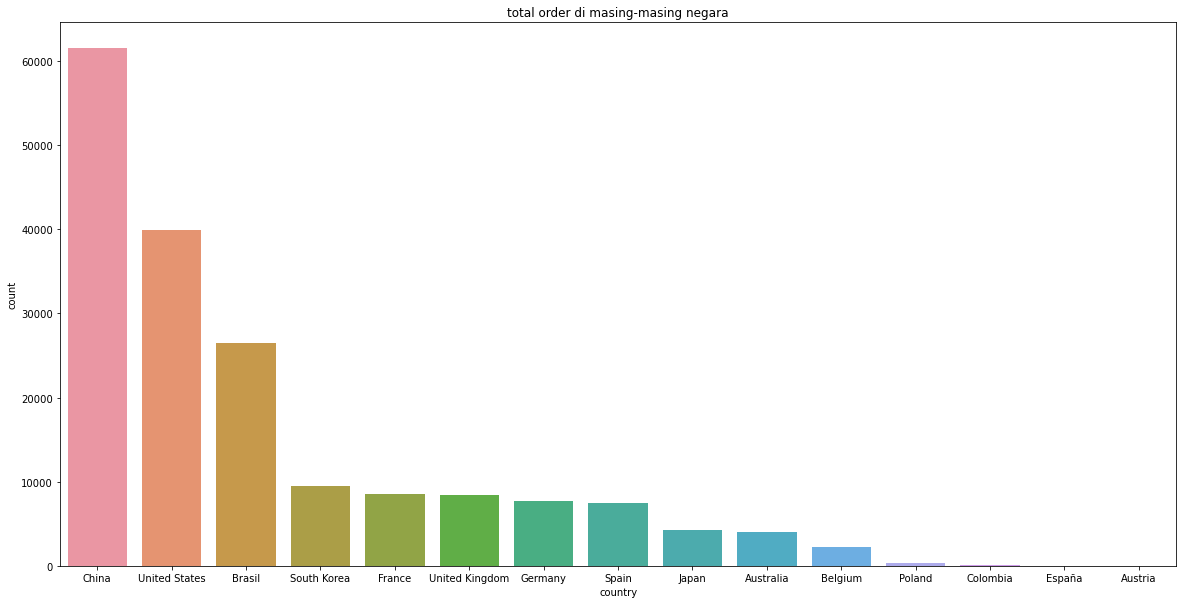

China             61533
United States     39960
Brasil            26472
South Korea        9519
France             8485
United Kingdom     8441
Germany            7734
Spain              7457
Japan              4213
Australia          4057
Belgium            2199
Poland              375
Colombia             42
España               13
Austria               8
Name: country, dtype: int64


In [21]:
#Melihat total order masing-masing negara
plot_count(x='country', data=dforder)
plt.title ('total order di masing-masing negara')
plt.show()
print(dforder['country'].value_counts()) 

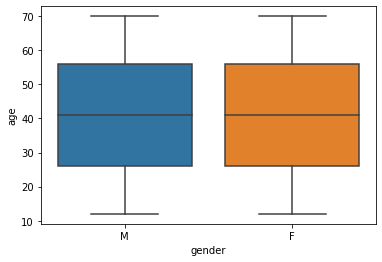

M    90501
F    90007
Name: gender, dtype: int64


In [22]:
sns.boxplot(data=dforder, x='gender', y='age') 
plt.xlabel('gender')
plt.ylabel('age')
plt.show()
print(dforder['gender'].value_counts()) 

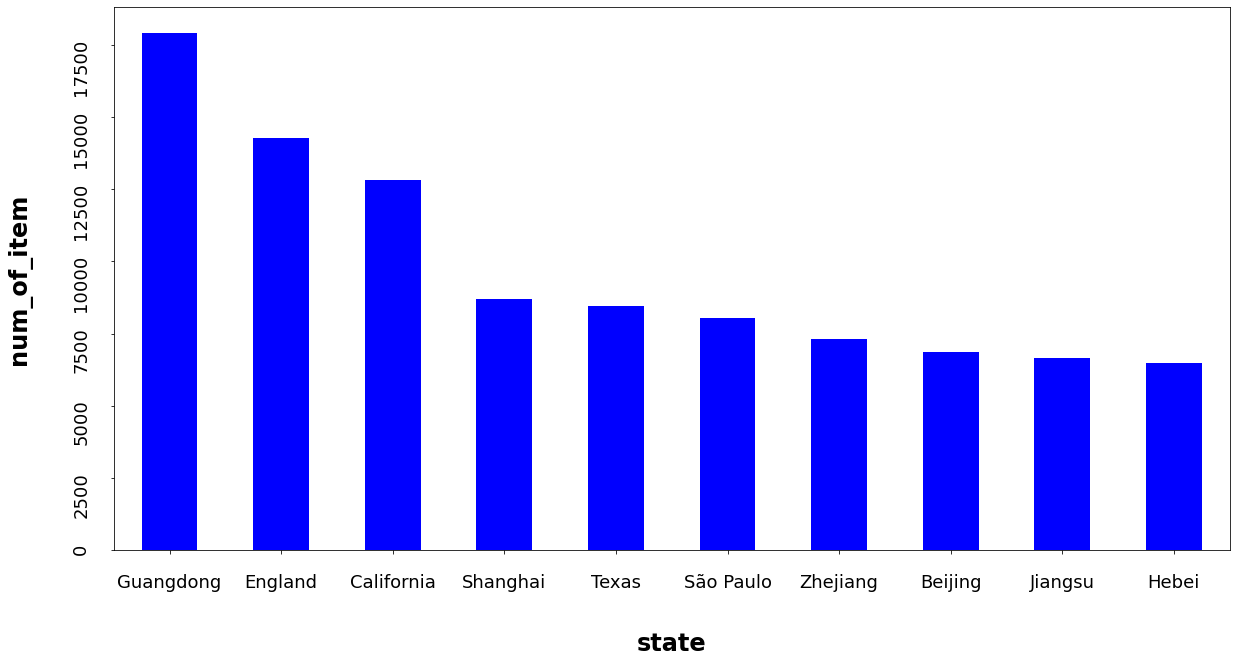

Guangdong     9357
England       7413
California    6619
Shanghai      4575
Texas         4500
              ... 
Akita            5
Shiga            4
Gifu             3
Wakayama         3
Mie              2
Name: state, Length: 226, dtype: int64


In [23]:
dfa=dforder.groupby('state')['num_of_item'].agg(['sum']).reset_index().nlargest(10,'sum')

dfa.plot(x='state', y='sum',kind="bar", figsize=(20,10), legend = None, color='blue')
plt.xlabel('state', fontsize=24, fontweight='bold', labelpad=40)
plt.ylabel('num_of_item', fontsize=24, fontweight='bold',labelpad=40)

plt.tick_params(axis='x', which='major', labelsize=18, pad=20, rotation=0)
plt.tick_params(axis='y', which='major', labelsize=18, pad=20, rotation=90)
 
plt.show()
print(dforder['state'].value_counts()) 

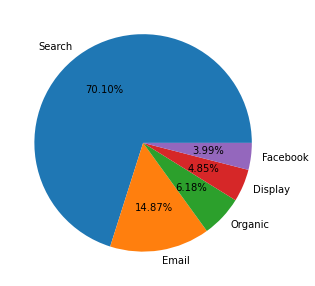

Search      126541
Organic      26846
Facebook     11158
Email         8756
Display       7207
Name: traffic_source, dtype: int64


In [24]:
plt.figure(figsize=(10,5))
plt.pie(dforder['traffic_source'].value_counts(), labels=dforder['traffic_source'].unique(),
        autopct='%.2f%%')
plt.show()
print(dforder['traffic_source'].value_counts()) 

# 3. Data Modeling Time Series & Forecasting

## Handling Missing Value

In [25]:
#melihat missing value
print(dforder.isnull().sum())

age                    0
gender                 0
state                  0
country                0
traffic_source         0
date_created           0
year_created           0
num_of_item            0
date_order             0
year_order             0
date_return       162756
year_return       162756
date_shipped       63006
year_shipped       63006
date_delivered    117473
year_delivered    117473
dtype: int64


In [26]:
dforder

,age,gender,state,country,traffic_source,date_created,year_created,num_of_item,date_order,year_order,date_return,year_return,date_shipped,year_shipped,date_delivered,year_delivered
0,60,M,Wallonia,Belgium,Search,2020-03,2020,2.0,2020-08,2020.0,NaN,NaN,NaN,NaN,NaN,NaN
1,60,M,Wallonia,Belgium,Search,2020-03,2020,1.0,2022-03,2022.0,NaN,NaN,2022-03,2022.0,NaN,NaN
2,34,M,Sichuan,China,Search,2020-05,2020,2.0,2021-09,2021.0,NaN,NaN,2021-09,2021.0,NaN,NaN
3,13,M,Jiangsu,China,Search,2020-08,2020,2.0,2020-12,2020.0,NaN,NaN,2020-12,2020.0,NaN,NaN
4,21,M,Victoria,Australia,Email,2021-05,2021,1.0,2021-12,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200517,61,F,Jiangxi,China,Search,2019-05,2019,1.0,2021-07,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
200518,61,F,Jiangxi,China,Search,2019-05,2019,2.0,2021-01,2021.0,NaN,NaN,2021-01,2021.0,2021-01,2021.0
200519,13,F,Pará,Brasil,Organic,2021-02,2021,1.0,2021-08,2021.0,NaN,NaN,NaN,NaN,NaN,NaN
200520,13,F,Pará,Brasil,Organic,2021-02,2021,2.0,2021-05,2021.0,NaN,NaN,NaN,NaN,NaN,NaN


## Time Series Plot

In [27]:
dfo=dforder[['date_order', 'num_of_item']]
dfo

,date_order,num_of_item
0,2020-08,2.0
1,2022-03,1.0
2,2021-09,2.0
3,2020-12,2.0
4,2021-12,1.0
...,...,...
200517,2021-07,1.0
200518,2021-01,2.0
200519,2021-08,1.0
200520,2021-05,2.0


In [28]:
result=dfo.groupby('date_order')['num_of_item'].sum().reset_index()
result

,date_order,num_of_item
0,2019-01,71.0
1,2019-02,183.0
2,2019-03,451.0
3,2019-04,817.0
4,2019-05,1041.0
5,2019-06,1004.0
6,2019-07,1423.0
7,2019-08,1804.0
8,2019-09,1881.0
9,2019-10,2132.0


In [29]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date_order   42 non-null     object 
 1   num_of_item  42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [30]:
result.drop([37,38,39,40,41], axis=0, inplace=True)

In [31]:
#Transformasi date_order ke tipe data datetime
result['date_order']=pd.to_datetime(result['date_order'], infer_datetime_format=True)
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_order   37 non-null     datetime64[ns]
 1   num_of_item  37 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 888.0 bytes


In [32]:
# Set kolom 'date_order' sebagai index
result=result.set_index(['date_order'])
result

,num_of_item
date_order,
2019-01-01,71.0
2019-02-01,183.0
2019-03-01,451.0
2019-04-01,817.0
2019-05-01,1041.0
2019-06-01,1004.0
2019-07-01,1423.0
2019-08-01,1804.0
2019-09-01,1881.0


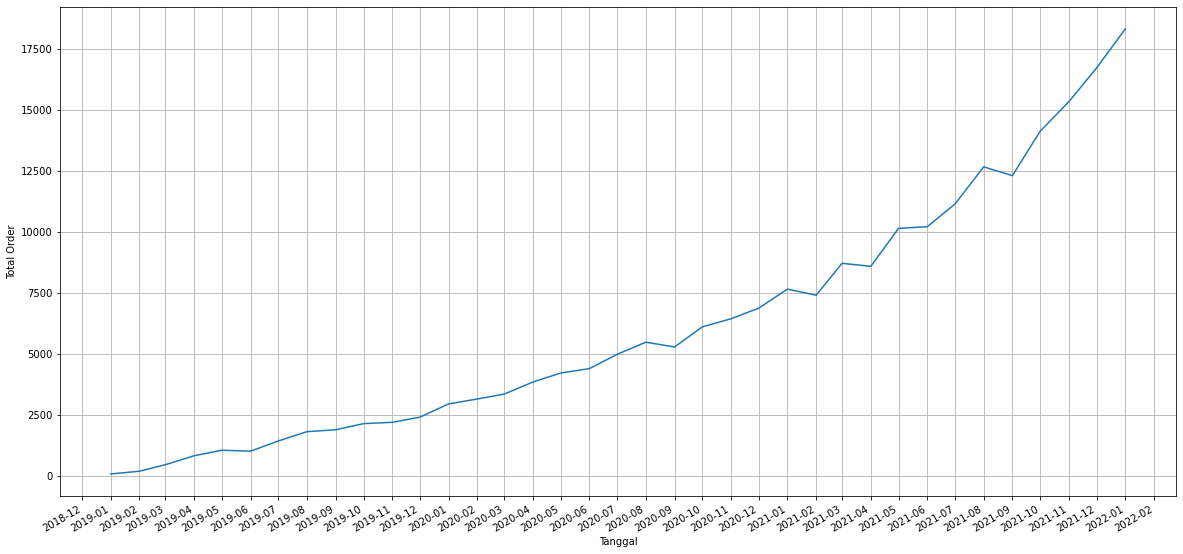

In [33]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plty

fig, ax = plty.subplots(figsize=(20,10))
plty.xlabel("Tanggal")
plty.ylabel("Total Order")

half_year_locator = mdates.MonthLocator(interval = 1)
year_month_formatter = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(result)
fig.autofmt_xdate()
plty.grid()
plty.show()

Insights:

1. Dari grafik di atas, dapat melihat bahwa dari data order tidak memiliki pola trend ataupun seasonal.

2. Akan di cek lagi menggunakan seasonal plot untuk melihat lebih jelas melalui bantuan package seaborn dan membuat dataframe sementara untuk membuat visualisasi seasonal plot.

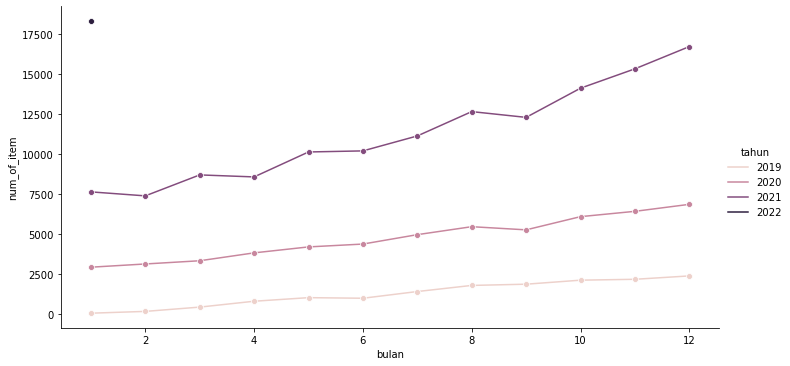

In [34]:
# Seasonal plot 

result2 = result.reset_index()
result2['tahun'] = pd.DatetimeIndex(result2['date_order']).year
result2['bulan'] = pd.DatetimeIndex(result2['date_order']).month

# parameter hue digunakan untuk menampilkan multiple line chart berdasarkan tahun ('year')
sns.relplot (kind = 'line', data = result2, x = 'bulan', y = 'num_of_item', hue = 'tahun', aspect = 2, marker='o' )

## Dekomposisi Seasonal Pattern

In [35]:
y = result['num_of_item']
x = result['num_of_item']
z = result['num_of_item']

In [36]:
import statsmodels.api as sm

# grafik untuk mendekomposisi seasonal pattern   
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()

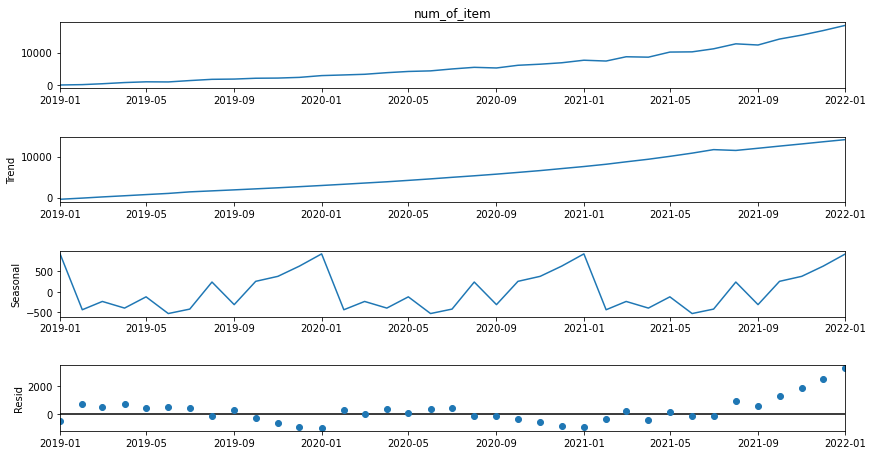

In [37]:
seasonal_decompose(y)

Insight
Dari 4 grafik diatas ditunjukkan bahwa:

1. Order secara umum meningkat setiap tahunnya
2. Order memiliki pattern seasonal tiap tahunnya

## Check for Stationarity
A dataset is stationary if its statistical properties like mean, variance, and autocorrelation do not change over time.

### a. Rolling test

In [38]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

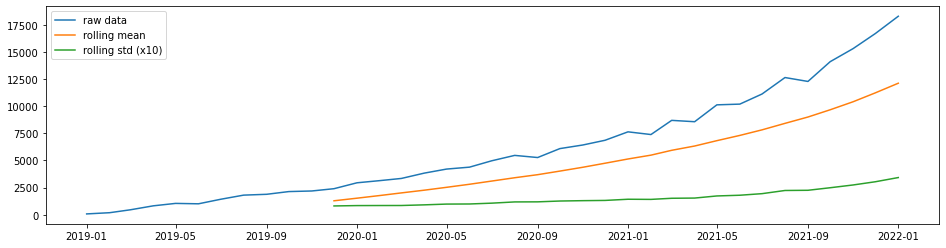

In [39]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

Insight:
Mean dan standar deviasi order terjadi perubahan seiring waktu, diperlukan pengujian stasioner lainnya

### b. Augmented Dickey-Fuller Test

Selanjutnya, akan gunakan ADF test untuk uji stasioner dimana:

H0: Time series tidak stasioner (memiliki beberapa struktur yang bergantung waktu)

H1: Time series tidak stasioner

P-value test harus kurang dari alpha (0.05) dan nilai ADF test harus lebih kecil dibandingkan critical values agar bisa H0 dapat ditolak.

In [40]:
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [41]:
ADF_test(y,'raw data')

 > Is the raw data stationary ?
Test statistic = 6.094
P-value = 1.000
Critical values :
	1%: -3.639224104416853 - The data is not stationary with 99% confidence
	5%: -2.9512301791166293 - The data is not stationary with 95% confidence
	10%: -2.614446989619377 - The data is not stationary with 90% confidence


Insight:
Nilai ADF statistic yang jauh lebih besar dari critical values pada semua level, dan juga p-value yang lebih besar dari 0.05 turut menandakan, kita gagal menolak null hypothesis pada 90%, 95%, dan 99% tingkat keyakinan, yang mengindikasikan bahwa data time series ini strongly non-stationary.

## Make the Data Stationary
Agar data dapat dimodel menggunakan time series analysis, diperlukan proses stationerisasi pada dataset

1. De-trending
2. Differencing
3. Kombinasi keduanya

### a. Differencing

 > Is the 12 lag differenced data stationary ?
Test statistic = 4.880
P-value = 1.000
Critical values :
	1%: -3.769732625845229 - The data is not stationary with 99% confidence
	5%: -3.005425537190083 - The data is not stationary with 95% confidence
	10%: -2.6425009917355373 - The data is not stationary with 90% confidence


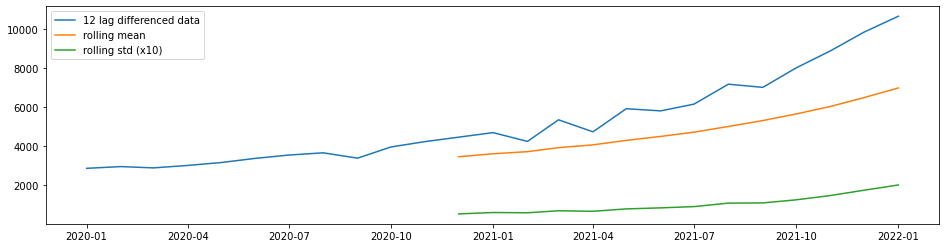

In [42]:
# Differencing
z_12lag =  z - z.shift(12)

test_stationarity(z_12lag,'12 lag differenced data')
ADF_test(z_12lag,'12 lag differenced data')

### b. Detrending

 > Is the de-trended data stationary ?
Test statistic = -7.378
P-value = 0.000
Critical values :
	1%: -3.7238633119999998 - The data is  stationary with 99% confidence
	5%: -2.98648896 - The data is  stationary with 95% confidence
	10%: -2.6328004 - The data is  stationary with 90% confidence


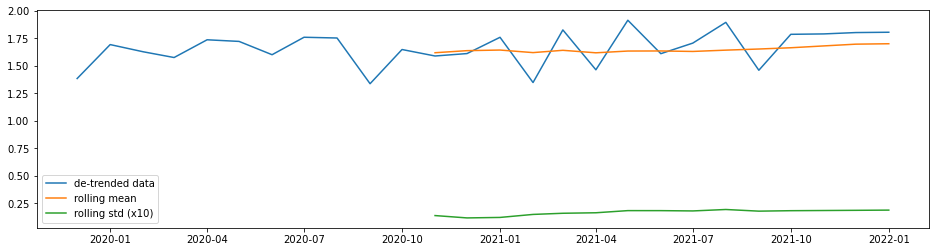

In [43]:
# Detrending
x_detrend =  (x - x.rolling(window=12).mean())/x.rolling(window=12).std()

test_stationarity(x_detrend,'de-trended data')
ADF_test(x_detrend,'de-trended data')

Insight
Pada Detrending diatas, dapat dilihat bahwa:
1. p-value jauh lebih kecil dari 0.05
2. T statistic yang juga jauh lebih kecil dari critical value 1%, 5% dan 10%

###### Artinya, H0 dapat ditolah dan data berhasil dibuat menjadi stasioner

## Membuat data Training & Testing (70:30)

In [44]:
y_to_train = result[:'2021-02-01'] # dataset to train
y_to_val = result['2021-02-01':] # last X months for test  
predict_date = len(result) - len(result[:'2021-02-01']) # the number of data points for the test set

Pemilihan Time Series Prediction Model:
1. Simple Exponential Smoothing (SES) for data without trend or seasonality
2. Holt’s Linear Trend Method for data with a trend but no seasonality
3. Holt-Winters’ Seasonal Method for data with trend and/or seasonality
4. SARIMA for data with trend and/or seasonality

### a. Simple Exponential Smoothing (SES)

In [45]:
def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 2021-03-01 00:00:00   NaN
2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
num_of_item           NaN
dtype: float64
The Root Mean Squared Error of our forecasts with auto optimization is 2021-03-01 00:00:00   NaN
2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
num_of_item           NaN
dtype: float64


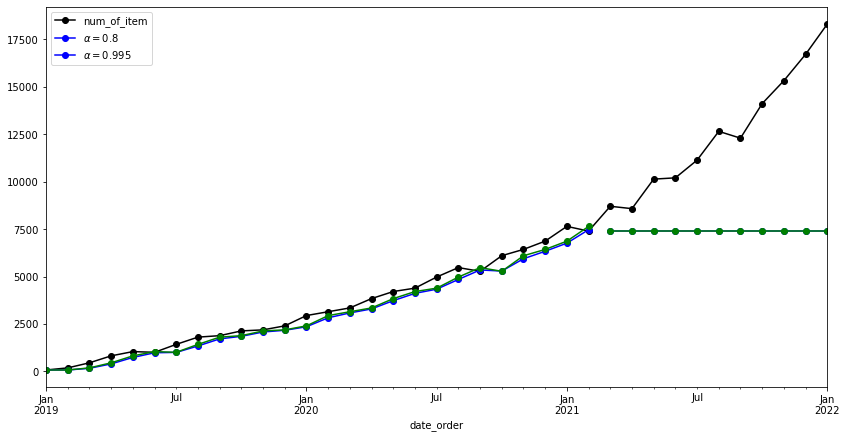

In [46]:
ses(y, y_to_train,y_to_val,0.8,predict_date)

### b. Holt's Linear Method

In [47]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)

    plt.show()

The Root Mean Squared Error of Holts Linear trend 2021-03-01 00:00:00   NaN
2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
num_of_item           NaN
dtype: float64
The Root Mean Squared Error of Holts Exponential trend 2021-03-01 00:00:00   NaN
2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
num_of_item           NaN
dtype: float64


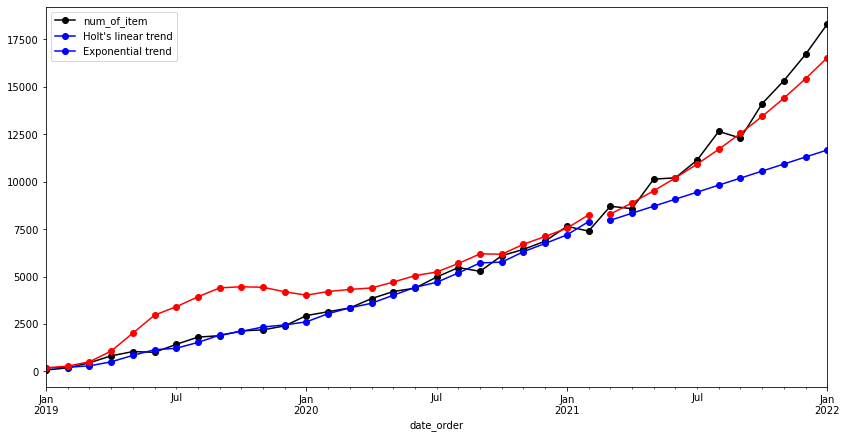

In [48]:
holt(y, y_to_train,y_to_val,0.6,0.2,predict_date)

### c. Holt-Winters’ Seasonal Method

In [49]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):
    
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit(use_boxcox=True)
        fcast1 = fit1.forecast(predict_date).rename('Additive')
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
        
        fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
        fcast2 = fit2.forecast(predict_date).rename('Additive+damped')
        mse2 = ((fcast2 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))
        
        fit1.fittedvalues.plot(style='--', color='red')
        fcast1.plot(style='--', marker='o', color='red', legend=True)
        fit2.fittedvalues.plot(style='--', color='green')
        fcast2.plot(style='--', marker='o', color='green', legend=True)
    
    elif seasonal_type == 'multiplicative':  
        fit3 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit(use_boxcox=True)
        fcast3 = fit3.forecast(predict_date).rename('Multiplicative')
        mse3 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))
        
        fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
        fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
        mse4 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
        fit3.fittedvalues.plot(style='--', color='red')
        fcast3.plot(style='--', marker='o', color='red', legend=True)
        fit4.fittedvalues.plot(style='--', color='green')
        fcast4.plot(style='--', marker='o', color='green', legend=True)
        
    else:
        print('Wrong Seasonal Type. Please choose between additive and multiplicative')

    plt.show()

The Root Mean Squared Error of additive trend, additive seasonal of period season_length=12 and a Box-Cox transformation 2021-03-01 00:00:00   NaN
2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
num_of_item           NaN
dtype: float64
The Root Mean Squared Error of additive damped trend, additive seasonal of period season_length=12 and a Box-Cox transformation 2021-03-01 00:00:00   NaN
2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
num_of_item           NaN
dtype: float64


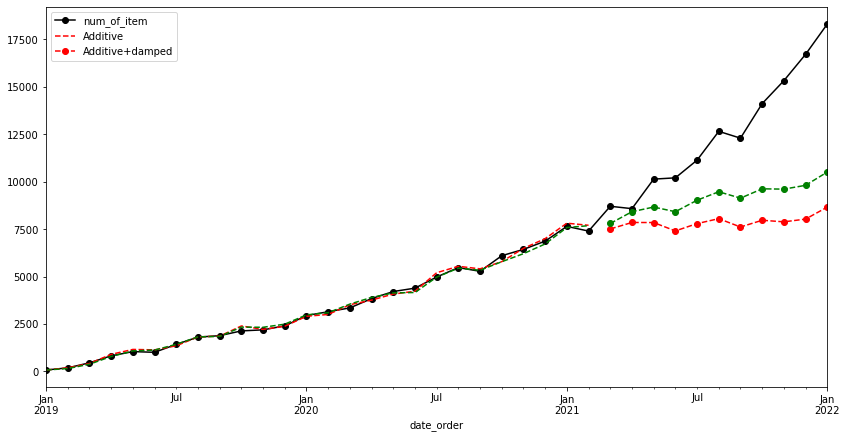

In [50]:
holt_win_sea(y, y_to_train,y_to_val,'additive',12, predict_date)

### d. SARIMA

In [51]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

#                 print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

In [52]:
sarima_grid_search(y,52)

The set of parameters with the minimum AIC is: SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:2.0


In [53]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3432      0.201     -1.704      0.088      -0.738       0.051
ar.S.L12       2.0747      0.178     11.665      0.000       1.726       2.423
ma.S.L12      -0.0741      0.471     -0.157      0.875      -0.997       0.848
sigma2      1.857e+05   7.62e+04      2.438      0.015    3.64e+04    3.35e+05


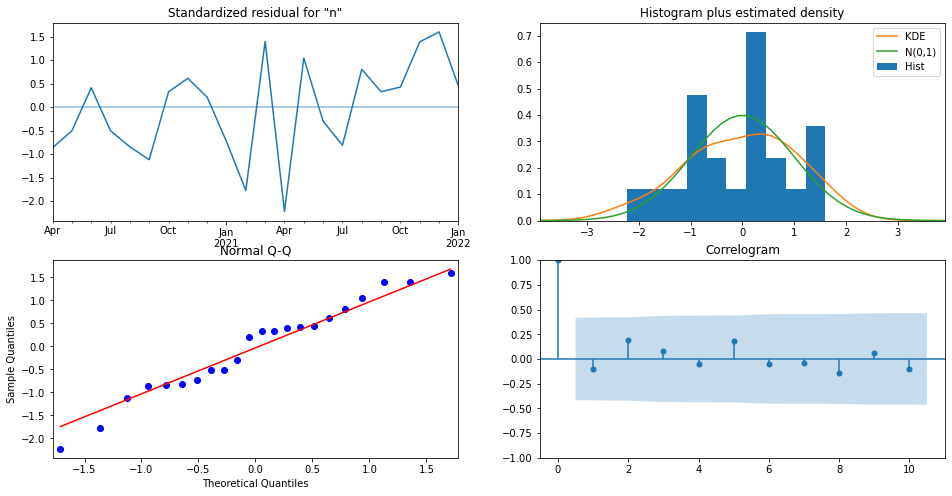

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = False 2021-02-01 00:00:00   NaN
2021-03-01 00:00:00   NaN
2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
num_of_item           NaN
dtype: float64


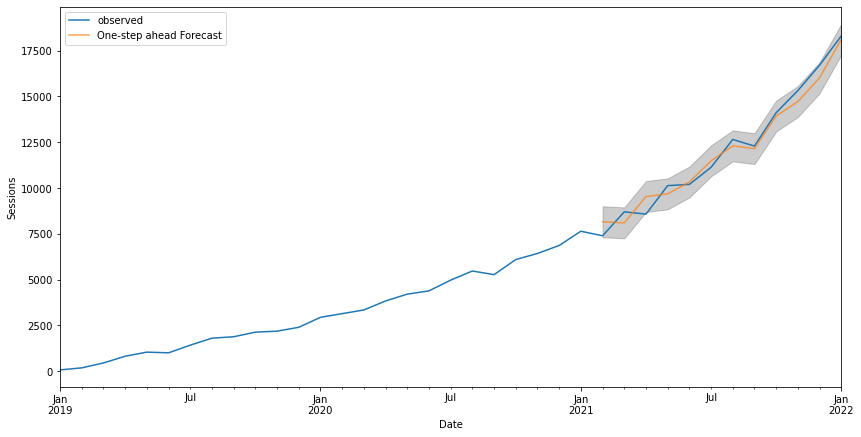

The Root Mean Squared Error of SARIMA with season_length=12 and dynamic = True 2021-02-01 00:00:00   NaN
2021-03-01 00:00:00   NaN
2021-04-01 00:00:00   NaN
2021-05-01 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-07-01 00:00:00   NaN
2021-08-01 00:00:00   NaN
2021-09-01 00:00:00   NaN
2021-10-01 00:00:00   NaN
2021-11-01 00:00:00   NaN
2021-12-01 00:00:00   NaN
2022-01-01 00:00:00   NaN
num_of_item           NaN
dtype: float64


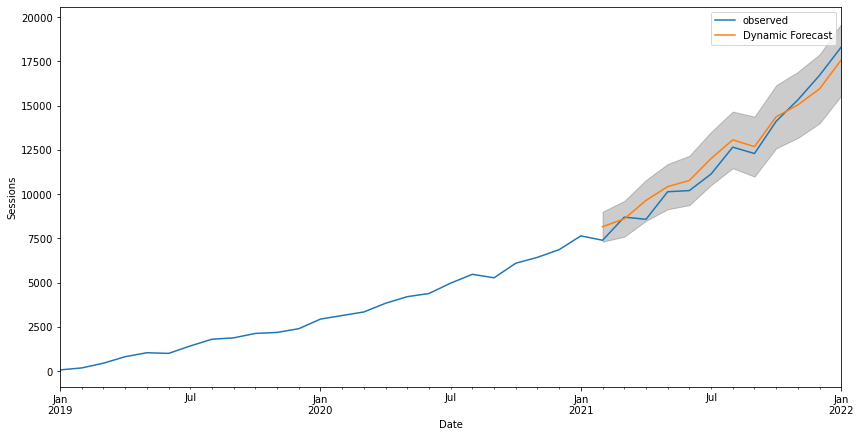

In [54]:
model = sarima_eva(y,(0, 1, 1),(1, 0, 1, 12),12,'2021-02-01',y_to_val)

In [55]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

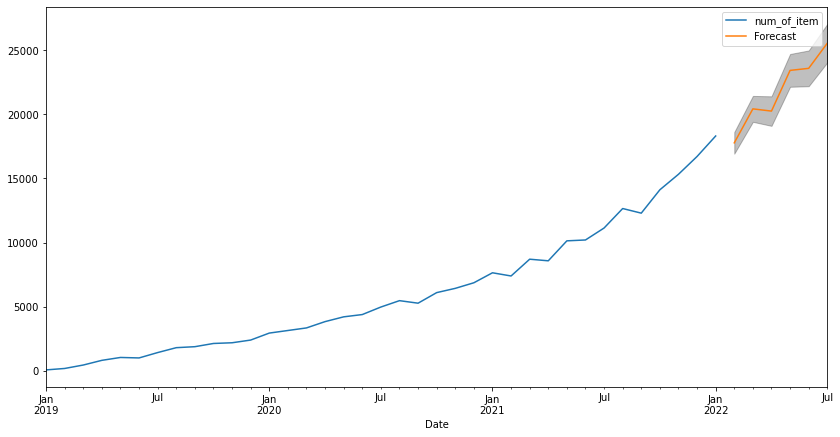

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2022-02-01,17773.74183213,16929.16317441,18618.32048985
1,2022-03-01,20423.41320747,19412.95511057,21433.87130437
2,2022-04-01,20250.40730390,19097.69830874,21403.11629907
3,2022-05-01,23423.09280887,22143.85456297,24702.33105478
4,2022-06-01,23583.12009742,22188.78765785,24977.45253698


In [56]:
final_table = forecast(model,6,result)
final_table.head()

Insight:
Dari hasil prediksi, dapat dilihat bahwa dari pertengahan 2022 hingga 2023 nanti, akan semakin banyak barang yang di order